# CS 435 Final Project
## Cole Schoenbauer, Stephen West, Sam Baeyen

# Installing Dependencies

In [2]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

import openpyxl
print('openpyxl: {}'.format(openpyxl.__version__))

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

from numpy import mean

from sklearn.preprocessing import PolynomialFeatures

from numpy import sqrt

from sklearn.model_selection import cross_val_score

from scipy import stats

Python: 3.11.8 (tags/v3.11.8:db85d51, Feb  6 2024, 22:03:32) [MSC v.1937 64 bit (AMD64)]
scipy: 1.11.3
numpy: 1.25.2
matplotlib: 3.7.2
pandas: 2.1.0
sklearn: 1.3.2
openpyxl: 3.1.2


# Loading Dataset

In [3]:
from pandas import read_excel

In [4]:
# Loading dataset
path = "crop_data.xlsx"
names = ['Year','Week#','Old Crop CBOT Price','Old Crop Weekly Unadjusted Basis','Old Crop Weekly Adjusted Basis','Old Crop Weekly Cash Price','New Crop CBOT Price','New Crop Weekly Unadjusted Basis','New Crop Weekly Adjusted Basis','New Crop Cash Price','Cash Price Spread','CBOT Price Spread','Canadian Dollar Value','Weekly 10 Year Avg Old Price']
dataset = read_excel(path, names=names)
dataset.head(10)

,Year,Week#,Old Crop CBOT Price,Old Crop Weekly Unadjusted Basis,Old Crop Weekly Adjusted Basis,Old Crop Weekly Cash Price,New Crop CBOT Price,New Crop Weekly Unadjusted Basis,New Crop Weekly Adjusted Basis,New Crop Cash Price,Cash Price Spread,CBOT Price Spread,Canadian Dollar Value,Weekly 10 Year Avg Old Price
1992,2,2.594,-0.0815,-0.467747,2.5125,NaN,NaN,NaN,NaN,NaN,NaN,0.870398,NaN,NaN
1992,3,2.636,-0.0735,-0.476017,2.5625,NaN,NaN,NaN,NaN,NaN,NaN,0.867528,NaN,NaN
1992,4,2.642,-0.0720,-0.488643,2.5700,NaN,NaN,NaN,NaN,NaN,NaN,0.863782,NaN,NaN
1992,5,2.646,0.0815,-0.387107,2.7275,NaN,NaN,NaN,NaN,NaN,NaN,0.849545,NaN,NaN
1992,6,2.624,0.1810,-0.287646,2.8050,NaN,NaN,NaN,NaN,NaN,NaN,0.848464,NaN,NaN
1992,7,2.636,0.1390,-0.348396,2.7750,NaN,NaN,NaN,NaN,NaN,NaN,0.843953,NaN,NaN
1992,8,2.646,0.1890,-0.298922,2.8350,NaN,NaN,NaN,NaN,NaN,NaN,0.844309,NaN,NaN
1992,9,2.672,0.2130,-0.266624,2.8850,NaN,NaN,NaN,NaN,NaN,NaN,0.847817,NaN,NaN
1992,10,2.642,0.2705,-0.233065,2.9125,NaN,NaN,NaN,NaN,NaN,NaN,0.839913,NaN,NaN
1992,11,2.674,0.1435,-0.377128,2.8175,NaN,NaN,NaN,NaN,NaN,NaN,0.837030,NaN,NaN


In [5]:
dataset.tail(10)

,Year,Week#,Old Crop CBOT Price,Old Crop Weekly Unadjusted Basis,Old Crop Weekly Adjusted Basis,Old Crop Weekly Cash Price,New Crop CBOT Price,New Crop Weekly Unadjusted Basis,New Crop Weekly Adjusted Basis,New Crop Cash Price,Cash Price Spread,CBOT Price Spread,Canadian Dollar Value,Weekly 10 Year Avg Old Price
2023,1655,4.81,1.02,-0.835217,5.83,5.11,1.01,-0.960927,6.12,-0.29,-0.30,0.721657,NaN,NaN
2023,1656,4.77,0.97,-0.776297,5.74,5.18,0.99,-0.906398,6.17,-0.43,-0.41,0.732011,NaN,NaN
2023,1657,4.64,0.95,-0.812736,5.59,5.07,1.00,-0.926093,6.07,-0.48,-0.43,0.724690,NaN,NaN
2023,1658,4.67,0.94,-0.794438,5.61,5.12,1.00,-0.901568,6.12,-0.51,-0.45,0.729182,NaN,NaN
2023,1659,4.64,0.91,-0.765504,5.55,5.11,1.00,-0.845221,6.11,-0.56,-0.47,0.734700,NaN,NaN
2023,1660,4.85,0.69,-1.005075,5.54,5.14,0.99,-0.806430,6.13,-0.59,-0.29,0.741015,NaN,NaN
2023,1661,4.86,0.71,-1.032310,5.57,5.13,0.99,-0.849105,6.12,-0.55,-0.27,0.736106,NaN,NaN
2023,1662,4.83,0.69,-0.937710,5.52,5.13,0.99,-0.738810,6.12,-0.60,-0.30,0.747943,NaN,NaN
2023,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing

In [38]:
# Because we'll be trying to predict old crop prices, we're only working with old crop data
# So we'll only import date information and old crop information
# Change Week# to increase continually for eventual model training

path = "crop_data.xlsx"
names = ['Year','Week#','Old Crop CBOT Price','Old Crop Weekly Unadjusted Basis','Old Crop Weekly Adjusted Basis','Old Crop Weekly Cash Price']
dataset = read_excel(path, names=names, usecols=[0,1,2,3,4,5], header=None)
dataset['Week#'] = range(1, len(dataset) + 1)
dataset.head()

,Year,Week#,Old Crop CBOT Price,Old Crop Weekly Unadjusted Basis,Old Crop Weekly Adjusted Basis,Old Crop Weekly Cash Price
0,1992,1,2.526,-0.0785,-0.460684,2.4475
1,1992,2,2.594,-0.0815,-0.467747,2.5125
2,1992,3,2.636,-0.0735,-0.476017,2.5625
3,1992,4,2.642,-0.0720,-0.488643,2.5700
4,1992,5,2.646,0.0815,-0.387107,2.7275


In [39]:
dataset.tail()

,Year,Week#,Old Crop CBOT Price,Old Crop Weekly Unadjusted Basis,Old Crop Weekly Adjusted Basis,Old Crop Weekly Cash Price
1659,2023,1660,4.85,0.69,-1.005075,5.54
1660,2023,1661,4.86,0.71,-1.032310,5.57
1661,2023,1662,4.83,0.69,-0.937710,5.52
1662,2023,1663,NaN,NaN,NaN,NaN
1663,2023,1664,NaN,NaN,NaN,NaN


In [33]:
# Last two rows contain null data, dropping these rows
# These are the only two rows that contained null data for these fields
# They're completely null too, so we decided to drop them
dataset.drop(axis=0, index=[len(dataset)-2, len(dataset)-1], inplace=True)
dataset.tail()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1138977243.py, line 6)

In [9]:
# Finding the columns that could have outliers
columns = []
print("Column -", "Value -", "Lower Bound -", "Upper Bound")
for i in range(0, len(dataset.columns)):
    column_sigma = dataset[names[i]].std()
    column_mean = dataset[names[i]].mean()
    for j in range(len(dataset)):
        if dataset.iloc[j,i] > (3*column_sigma)+column_mean or dataset.iloc[j,i] < (-3*column_sigma)+column_mean:
            print(j, dataset.iloc[j,i], (3*column_sigma)+column_mean, (-3*column_sigma)+column_mean)
            columns.append(i)
            break

print("Columns with outliers", columns)

Column - Value - Lower Bound - Upper Bound
237 2.9825 2.646366505957008 -1.3548253908346655
237 1.6980000000000004 0.9361122557095993 -1.3442166355575735
1525 9.06 9.040207366820571 -0.35712794443789786
Columns with outliers [3, 4, 5]


                                      Year     Week#  Old Crop CBOT Price  \
Year                              1.000000  0.999512             0.633656   
Week#                             0.999512  1.000000             0.631887   
Old Crop CBOT Price               0.633656  0.631887             1.000000   
Old Crop Weekly Unadjusted Basis  0.103707  0.104998            -0.199466   
Old Crop Weekly Adjusted Basis   -0.091807 -0.088637            -0.253704   
Old Crop Weekly Cash Price        0.673573  0.672413             0.909170   

                                  Old Crop Weekly Unadjusted Basis  \
Year                                                      0.103707   
Week#                                                     0.104998   
Old Crop CBOT Price                                      -0.199466   
Old Crop Weekly Unadjusted Basis                          1.000000   
Old Crop Weekly Adjusted Basis                            0.570895   
Old Crop Weekly Cash Price              

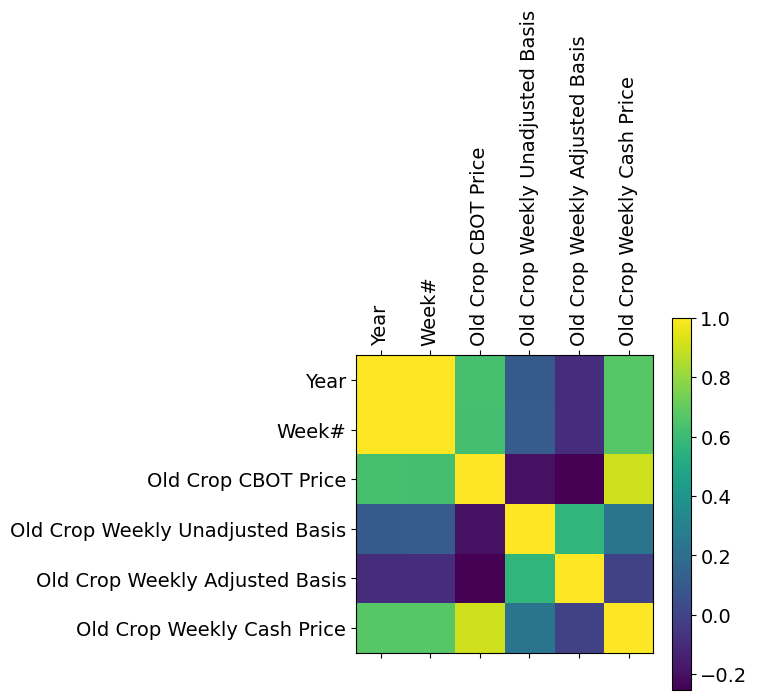

In [10]:
# Checking correlation between variables
from matplotlib import pyplot as plt

plt.matshow(dataset.corr())
print(dataset.corr())
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.xticks(range(dataset.select_dtypes(['number']).shape[1]), dataset.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(dataset.select_dtypes(['number']).shape[1]), dataset.select_dtypes(['number']).columns, fontsize=14)
plt.show()

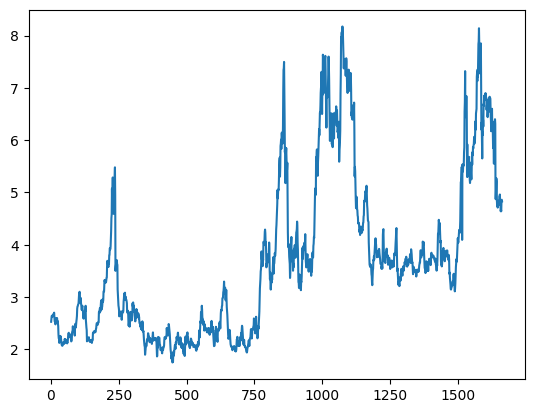

In [25]:
#Week is the most correlated to Old Crop CBOT price, which is out desired result, so we will use Week#
array = dataset.values
X = array[:,1:2]
Y = array[:,2]

plt.plot(X, Y)
plt.show()

In [29]:
import sklearn.metrics as sm

#Iterate through increasing values for Polynomial degree, choose best from print out
'''for i in range(1, 20):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, Y, test_size=0.3, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    model_predicted = model.predict(X_test)
    print(i, " R2 score =", round(sm.r2_score(y_test, model_predicted), 2))
'''
#Using best value for degree from previous loop, transform X and assign to poly_features
poly = PolynomialFeatures(degree=8, include_bias=False)
poly_features = poly.fit_transform(X)

#Create a train test split and train model
X_train, X_test, y_train, y_test = train_test_split(poly_features, Y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

#Predict X_test then compare with actual results from y_test
model_predicted = model.predict(X_test)

print("Mean absolute error =", round(sm.mean_absolute_error(y_test, model_predicted), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, model_predicted), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, model_predicted), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, model_predicted), 2)) 
print("R2 score =", round(sm.r2_score(y_test, model_predicted), 2))



Mean absolute error = 0.61
Mean squared error = 0.64
Median absolute error = 0.47
Explain variance score = 0.73
R2 score = 0.73
